In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix

In [2]:
plt.style.use('ggplot')

## Load Data 

In [3]:
df = pd.read_csv('train.csv')
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [5]:
df.shape

(11153, 22)

In [6]:
df.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
count,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11152.000000,11152.000000,11153.000000
mean,1.433208,1.349218,1.034646,1.735587,1985.837084,0.995517,3.176195,2009.174124,6.277952,3.720165,3.505694,1.202726,3.664216,1.100152,72.234902,0.679071,0.146777
std,0.431086,0.324660,0.416723,0.441040,4.632214,0.881103,13.321687,4.117162,5.033553,2.399068,1.818028,2.575138,2.652648,2.714525,23.030421,1.107381,0.353899
min,0.000000,0.000000,0.000000,1.000000,1963.000000,0.000000,0.000000,1982.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000
25%,1.224745,1.224745,0.707107,1.000000,1985.000000,0.000000,2.820000,2008.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000
50%,1.352775,1.352775,1.118034,2.000000,1987.000000,1.000000,3.070000,2010.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000
75%,1.414214,1.385641,1.224745,2.000000,1989.000000,2.000000,3.270000,2012.000000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000
max,2.958040,2.828427,2.677686,2.000000,1997.000000,7.000000,378.000000,2019.000000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,130.000000,3.000000,1.000000


In [7]:
df.describe(include = ['O'])

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
count,11153,11153,11153,11153,11153
unique,3,8,3,2,6
top,JG04,PG03,RM_type_A,Y,level_4
freq,10413,9655,7287,9501,9222


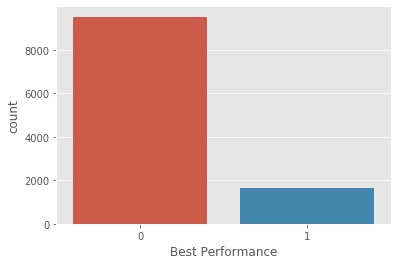

In [8]:
sns.countplot(x='Best Performance', data=df)
plt.show()

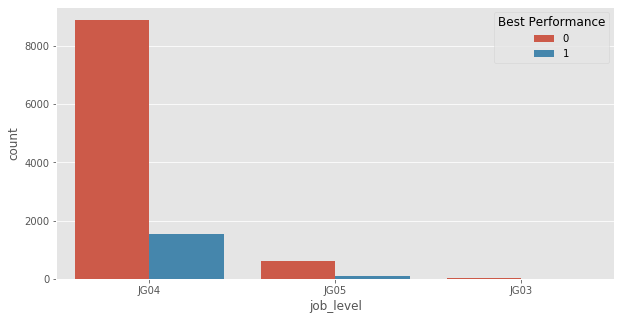

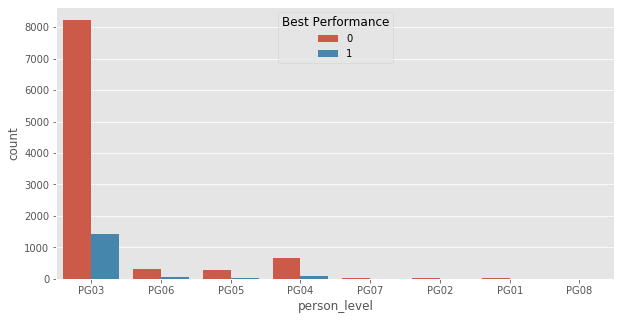

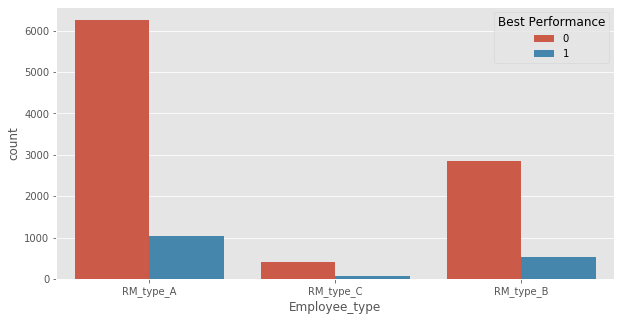

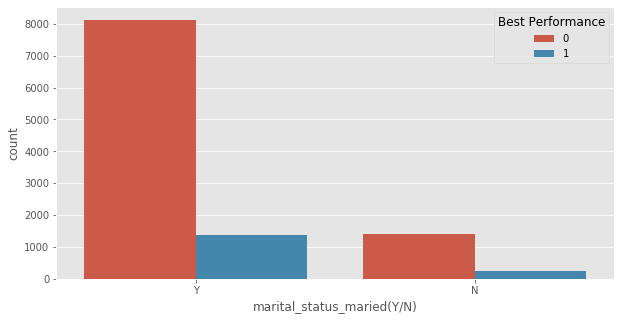

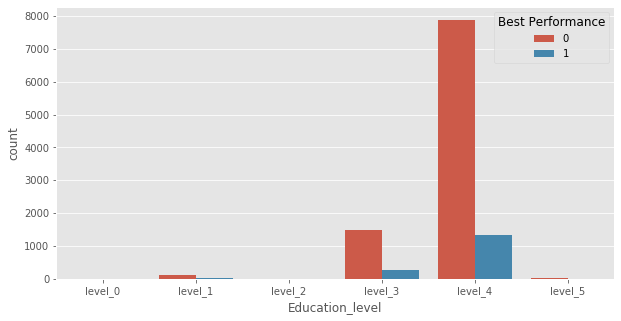

In [9]:
CAT = [i for i in df.select_dtypes(include='object')]

for i in CAT:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i], 
                  data=df, 
                  hue='Best Performance'
                 )
    plt.show()

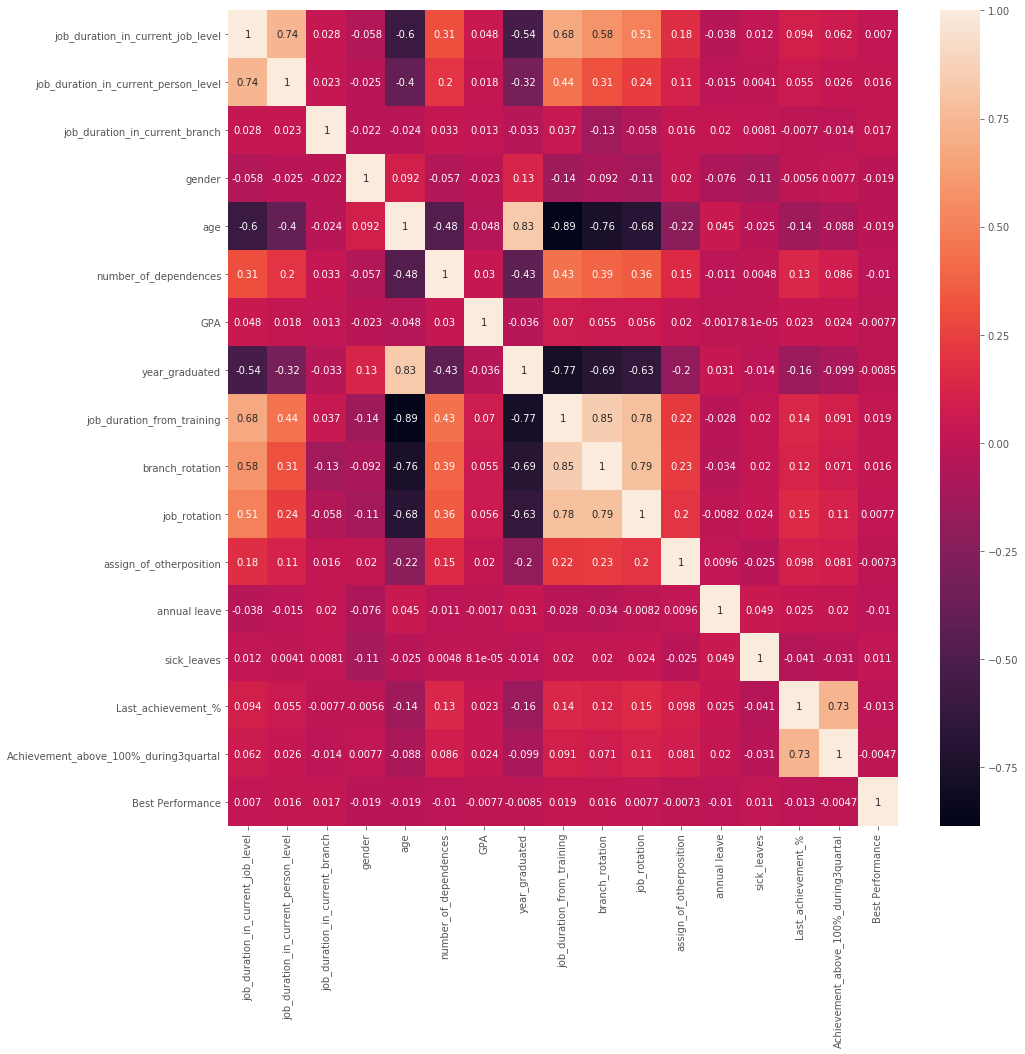

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
            annot=True
           )
plt.show()

In [11]:
df = df.dropna()

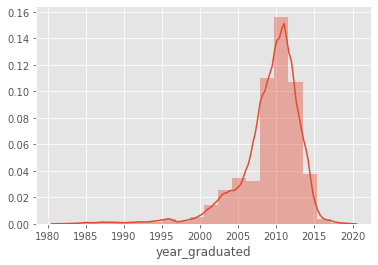

In [12]:
sns.distplot(df['year_graduated'], bins = 20)

In [13]:
now = datetime.datetime.now()
current_year = now.year
df['age'] = current_year - df['age']

df['marital_status_maried(Y/N)'] = df['marital_status_maried(Y/N)'].map(dict(Y=1, N=0))

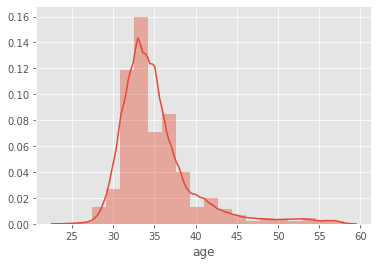

In [14]:
sns.distplot(df['age'], bins = 20)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11152 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11152 non-null  object 
 1   job_duration_in_current_job_level      11152 non-null  float64
 2   person_level                           11152 non-null  object 
 3   job_duration_in_current_person_level   11152 non-null  float64
 4   job_duration_in_current_branch         11152 non-null  float64
 5   Employee_type                          11152 non-null  object 
 6   gender                                 11152 non-null  int64  
 7   age                                    11152 non-null  int64  
 8   marital_status_maried(Y/N)             11152 non-null  int64  
 9   number_of_dependences                  11152 non-null  int64  
 10  Education_level                        11152 non-null  object 
 11  GP

<function matplotlib.pyplot.show(*args, **kw)>

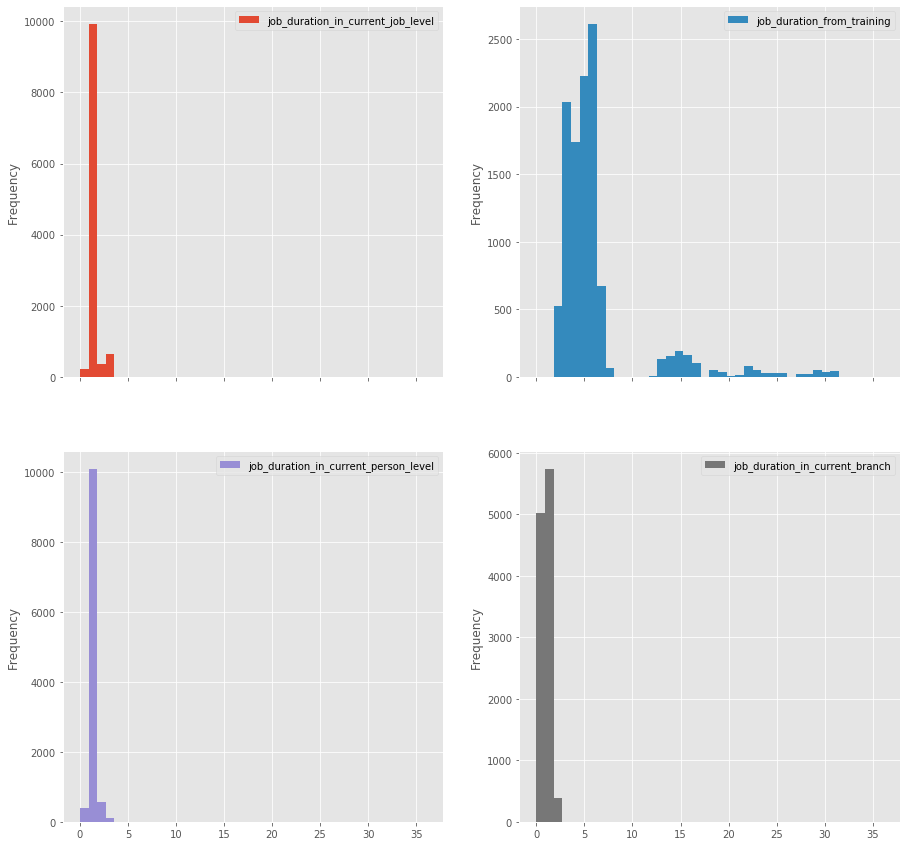

In [16]:
df[['job_duration_in_current_job_level', 'job_duration_from_training','job_duration_in_current_person_level','job_duration_in_current_branch']].plot.hist(subplots = True, layout = (2,2), figsize =(15,15), bins = 40)
plt.style.use("ggplot")
plt.show

In [17]:
# process categorical data (one-hot-encoding)
cat_vars = ['Employee_type', 'gender']
for var in cat_vars:
    data_dummies = pd.get_dummies(df[var], prefix=var)
    df = pd.concat([df, data_dummies], axis=1)

In [18]:
le = LabelEncoder()

df['jl_label'] = le.fit_transform(df.loc[:, 'job_level'])
df['pl_label'] = le.fit_transform(df.loc[:, 'person_level'])

In [19]:
# remove categorical data
del df['job_level']
del df['person_level']
del df['Employee_type']
df.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,...,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,gender_1,gender_2,jl_label,pl_label
0,1.352775,1.352775,1.732051,2,36,1,1,level_0,2.86,2011,...,46.37,0.0,0,1,0,0,0,1,1,2
1,1.292285,1.292285,1.039230,2,32,1,0,level_1,7.28,2007,...,47.68,0.0,0,1,0,0,0,1,1,2
2,2.565151,2.308679,1.780449,1,51,1,1,level_1,0.00,1989,...,40.73,0.0,0,0,0,1,1,0,2,5
3,2.828427,1.000000,1.385641,2,54,1,2,level_1,0.00,1987,...,47.42,0.0,1,1,0,0,0,1,2,5
4,2.828427,2.828427,0.707107,2,56,1,3,level_1,7.20,1985,...,47.18,0.0,0,1,0,0,0,1,2,5


In [20]:
df['Education_level'] = le.fit_transform(df['Education_level'])
del df['gender']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11152 entries, 0 to 11152
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_duration_in_current_job_level      11152 non-null  float64
 1   job_duration_in_current_person_level   11152 non-null  float64
 2   job_duration_in_current_branch         11152 non-null  float64
 3   age                                    11152 non-null  int64  
 4   marital_status_maried(Y/N)             11152 non-null  int64  
 5   number_of_dependences                  11152 non-null  int64  
 6   Education_level                        11152 non-null  int32  
 7   GPA                                    11152 non-null  float64
 8   year_graduated                         11152 non-null  int64  
 9   job_duration_from_training             11152 non-null  int64  
 10  branch_rotation                        11152 non-null  int64  
 11  jo

In [22]:
target = df['Best Performance']
feature = df.drop('Best Performance', axis = 1)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=12)

In [24]:
#import library untuk SVC dan library lainnya yg dibutuhkan
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

Training accuracy : 0.8502410043717072
Testing accuarcy : 0.8650829224562976
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1930
           1       0.00      0.00      0.00       301

    accuracy                           0.87      2231
   macro avg       0.43      0.50      0.46      2231
weighted avg       0.75      0.87      0.80      2231

[[1930    0]
 [ 301    0]]


E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


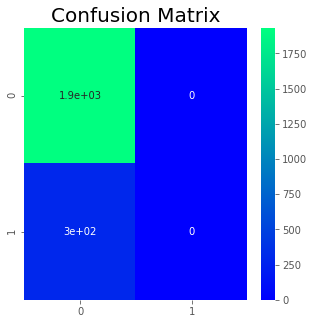

In [25]:
#pembuatan model SVC
model = SVC()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuarcy :", model.score(X_test, y_test))
svc = model.score(X_test, y_test)
cr = classification_report(y_test, y_pred)
print(cr)

cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm1, annot = True, cmap = 'winter')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Training accuracy : 0.8502410043717072
Testing accuarcy : 0.8650829224562976
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1930
           1       0.00      0.00      0.00       301

    accuracy                           0.87      2231
   macro avg       0.43      0.50      0.46      2231
weighted avg       0.75      0.87      0.80      2231

[[1930    0]
 [ 301    0]]


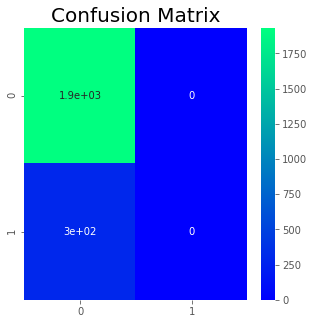

In [26]:
#import library LogisticRegression
from sklearn.linear_model import LogisticRegression

#pembuatan model LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Training accuracy :", lr.score(X_train, y_train))
print("Testing accuarcy :", lr.score(X_test, y_test))
logreg = lr.score(X_test, y_test)
cr = classification_report(y_test, y_pred)
print(cr)
 
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm2, annot = True, cmap = 'winter')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

Training accuracy : 1.0
Testing accuarcy : 0.8650829224562976
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1930
           1       0.00      0.00      0.00       301

    accuracy                           0.87      2231
   macro avg       0.43      0.50      0.46      2231
weighted avg       0.75      0.87      0.80      2231

[[1930    0]
 [ 301    0]]


E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


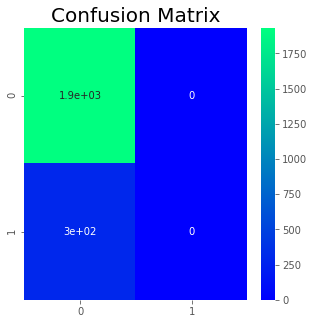

In [27]:
#import library RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#pembuatan model RandomForestClassifier
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("Training accuracy :", rf_clf.score(X_train, y_train))
print("Testing accuarcy :", rf_clf.score(X_test, y_test))
ranfor = rf_clf.score(X_test, y_test)
cr = classification_report(y_test, y_pred)
print(cr)

cm3 = confusion_matrix(y_test, y_pred)
print(cm3)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm3, annot = True, cmap = 'winter')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [28]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix

In [29]:
rf_probs = rf_clf.predict_proba(X_test)
y_pred = rf_probs[:, 1]

Random Forest ROC AUC: 0.542
Best Threshold: 0.2



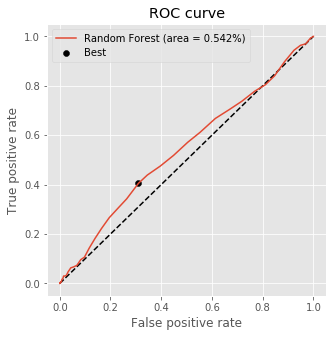

In [30]:
rf_probs = rf_clf.predict_proba(X_test)
y_pred = rf_probs[:, 1]

# set threshold
rf_auc = roc_auc_score(y_test, y_pred)

print(f'Random Forest ROC AUC: {rf_auc:.3f}')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# get the best threshold for testing
J = tpr_rf - fpr_rf
ix = np.argmax(J)
best_threshold = thresholds_rf[ix]
print(f'Best Threshold: {best_threshold}\n')

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.3f}%)')
plt.scatter(fpr_rf[ix], tpr_rf[ix], marker='o', color='black', label='Best')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [31]:
y_pred[y_pred >= best_threshold] = 1
y_pred[y_pred < best_threshold] = 0

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1930
           1       0.17      0.41      0.24       301

    accuracy                           0.65      2231
   macro avg       0.53      0.55      0.51      2231
weighted avg       0.79      0.65      0.70      2231



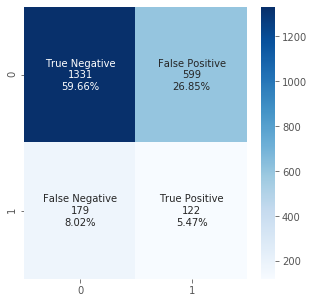

In [32]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

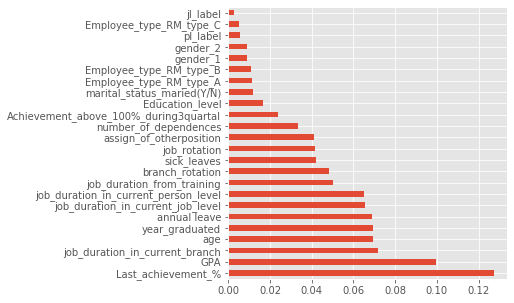

In [33]:
importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)
data_vars = df.columns.values.tolist()
y = ['Best Performance']
X = [i for i in data_vars if i not in y]
feature_importances = pd.Series(importance_scores, index=X)
feature_importances.nlargest(len(X)).plot(kind='barh')